# Data Loading

## Create Labeled Data

In [ ]:
# pylot is for creating graphs and charts
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
X, y = make_moons(noise=0.352, random_state=1, n_samples=100)
# random_state = 1 will make sure that every time it generates the exactly same result
# make_moon is just simply a dataset from sklearn that we can use to practice

In [ ]:
X.shape
# X is a two-dimensional array, it has 100 data points, where each data point has 2 features
# Make_moons generate X with 2 features by default

(100, 2)

In [ ]:
y.shape
# y is a one-dimensional array, it has 100 labels

(100,)

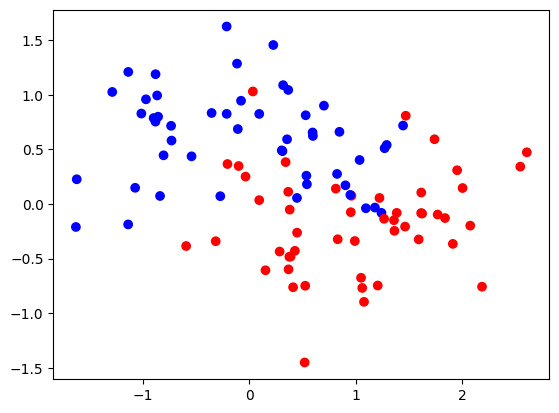

In [ ]:
plt.scatter(X[:,0], X[:,1],c=y, cmap='bwr')
# This uses matplotlib's scatter function
# The first two parameters are two colomns of X
# c is the color which is depended on y(label)
# 'bwr' stands for blue-white-red color map

## Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
# random_state = 42 will ensure that the values are the same everytime

In [ ]:
X.shape

(100, 2)

In [ ]:
X_train.shape

(75, 2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Train the data

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 13)

In [ ]:
knn.fit(X_train,y_train)
# This step is essentially which trains the data

KNeighborsClassifier(n_neighbors=13)

In [ ]:
knn.predict(X_test)
# Actually this step is just unnecessary, professor run this code to show us the predict results

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1])

In [ ]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1])

In [ ]:
y_test.shape

(25,)

In [ ]:
# import numpy as np
# y_test = y_test.reshape((1,25))

In [ ]:
# y_test.shape

## Predict & Comapre ( 1 function: score)

In [ ]:
knn.score(X_test,y_test)
# Score function does 2 things: 1. Predict results from train set 2. Calculate the accuracy of predictions with the actual test set

0.8

In [ ]:
knn.score(X_train, y_train)

0.8533333333333334

### Conclusion
train --> predict --> compare
#### train function: fit
#### predict&compare function: score

## Data loading with Pandas
Load `adult` dataset using Pandas.

In [ ]:
import pandas as pd

In [ ]:
mydata = pd.read_csv('adult.csv', index_col=0)
# Index_col is for setting the index(row label) of the dataframe
# In this case, the index will be the first column

In [ ]:
type(mydata)

pandas.core.frame.DataFrame

In [ ]:
mydata.shape

(32561, 14)

In [ ]:
mydata.head()
# head function is to retrieve first few rows of a DataFrame
# it will retrieve 5 rows by default

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
mydata.columns[:5]
# mydata.columns returns an Index object containing all the column names of the DataFrame mydata.
# [:5] is a slicing operation applied to the Index of column names, which retrieves the first five elements.

Index(['age', 'workclass', 'education', 'education-num', 'marital-status'], dtype='object')

In [ ]:
mydata.columns[1:3]
# when writing 1, it will include index 1, which is the 2nd in Python
# the second digit 3 means that it will exclude index 3, which is the 4th of Python
# So the result will be actual 2nd to 3rd

Index(['workclass', 'education'], dtype='object')

In [ ]:
import numpy as np
np.unique(mydata.income, return_counts=True)
# NumPy's unique function is to find unique elements of an array
# mydata.income is actually a 'series' of pandas, but numpy will treat it as an array in this case
# 'series' has name, but 'array' doesn't

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

#### 1000 patients
#### 997 of them don't have cancer, 3 have cancer
#### MyModel has an accuracy of 99%
#### Imbalanced dataset

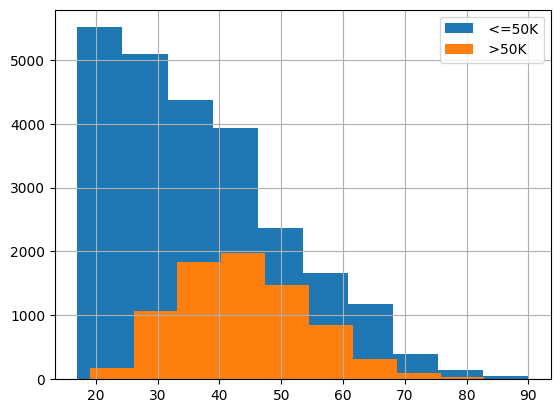

In [ ]:
mydata.groupby('income').age.hist(legend=True);
# 'groupby' function creates groups based on income
# Y axis of the histogram is the frequency

## Simple analysis
- Check the shape of the dataset,
- list the column names count number of unique values in `income` column,
- plot the histogram of age grouped by income

In [ ]:
mydata.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

# Splitting into training and test data

In [ ]:
mydata.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [ ]:
X = mydata.drop('income', axis=1)

In [ ]:
y = mydata['income']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42, stratify=y)
# stratify ensures that the distribution of the target variable (y)
# is the same in both the training and testing datasets.

In [ ]:
a,b = np.unique(y,return_counts=True)
print("Unique categories:", a)
print("Counts:", b)
# This unique function is based on y, which is the income
# a will be the unique names of y, which would be '<=50k' and '>50k'
# b will be the exact amount of each of the unique value

Unique categories: [' <=50K' ' >50K']
Counts: [24720  7841]


In [ ]:
print("Count of the first unique category (<=50K):", b[0])
print("Total count of all entries:", sum(b))
b[0]/sum(b)
# This step is for estimating the model

Count of the first unique category (<=50K): 24720
Total count of all entries: 32561


0.7591904425539756

In [ ]:
a1,b1=np.unique(y_train,return_counts=True)
print("Count of the first unique category in the training set (<=50K):", b1[0])
print("Total count of all entries in the training set:", sum(b1))
b1[0]/sum(b1)

Count of the first unique category in the training set (<=50K): 18539
Total count of all entries in the training set: 24420


0.7591728091728092

# Exercise I
Load the "boston house prices" dataset from the ``boston_house_prices.csv`` file using the ``pd.read_csv`` function (you don't need ``index_column`` here).
You can find a description of this dataset in the ``boston_house_prices.txt`` file.

This is a regression dataset with "MEDV" the median house value in a block in thousand dollars the target.
How many features are there and how many samples?

Split the data into a training and a test set for learning.
Optionally you can plot MEDV vs any of the features using the ``plot`` method of the dataframe (using ``kind="scatter"``).

In [ ]:
import pandas as pd
house = pd.read_csv('boston_house_prices.csv')

In [ ]:
house.shape

(506, 14)

In [ ]:
house.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
import numpy as np
np.unique(house.RAD)
# To check if it's numerical or categoritical
# 这个决定了要不要进行classfication

array([ 1,  2,  3,  4,  5,  6,  7,  8, 24])

In [ ]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
house.columns[-1]

'MEDV'

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'MEDV')

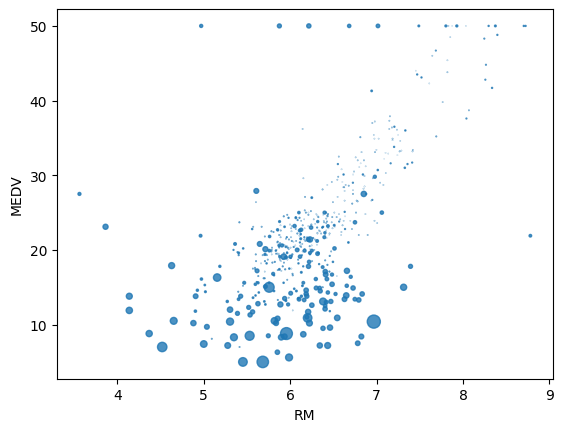

In [ ]:
plt.scatter(house.RM, house.MEDV, alpha=0.8, s=house.CRIM)
# s is the area of the circle
plt.xlabel('RM')
plt.ylabel('MEDV')

In [ ]:
X_h = house.drop('MEDV', axis=1)
# axis = 0 will drop the corresponding row
# axis = 1 will drop the corresponding column

In [ ]:
y_h = house['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h,y_h, random_state = 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knnr = KNeighborsRegressor()

In [ ]:
knnr.fit(X_train_h, y_train_h)

KNeighborsRegressor()

In [ ]:
print(f'{knnr.score(X_train_h, y_train_h):.2f}')
print(f'{knnr.score(X_test_h, y_test_h):.2f}')

0.67
0.53


## Load Datasets from ScikitLearn
Load digits dataset from sklearn

In [ ]:
#MNIST
from sklearn.datasets import load_digits

digits = load_digits()

In [ ]:
type(digits)
# A Bunch is a special type of container used in Scikit-Learn
# that behaves very much like a Python dictionary but allows you to access values
# using keys as attributes.

sklearn.utils._bunch.Bunch

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
X = digits.data
# X comes from the dictionary-like digits object, specifically the value corresponding to the key ‘data’.

In [ ]:
y = digits.target

In [ ]:
type(house)
# DataFrame is not an arrary, but its value is
# DataFrame has rows and columns which each has names

pandas.core.frame.DataFrame

In [ ]:
type(X)
# ndarray stands for n-dimensional array
# sklearn did previously to make this ndarray, cause it's more effecient

numpy.ndarray

In [ ]:
X.shape
# 1797 is the number of samples, which means there're 1797 images in this
# dataset 64 is the number of features for each sample, which means each image
# is 8x8 pixels

(1797, 64)

In [ ]:
pd.DataFrame(X, columns=digits.feature_names)
# This step turned 'X', an ndarray, into a dataframe
# the columns parameter is for naming the columns since array doesn't have column names
# dataframe has names for columns and rows, but array doesn't.
# This step is actually creating a new thing, it won't affect the original X's
# type. %%

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
import numpy as np
np.unique(y, return_counts=True)
# Check the unique values of target column

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [ ]:
X[0,:6]
# This is what we call 'slice'
# 0 means the first row of the array
# :6 means the first 6 elements of the first row, which is 6 columns, too

array([ 0.,  0.,  5., 13.,  9.,  1.])

In [ ]:
X[3:6,6:11]
# This will take row 3 to 5 and their column 6 to 10
# 先选横排，再选它们的竖列

array([[ 0.,  0.,  0.,  8., 13.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 14.]])

In [ ]:
X[0].reshape((8,8)).shape
# X[0] is the first row of X
# reshape function turn the 64 elements into a 2-dimensional array
# So that we can convert the thing back to image

(8, 8)

In [ ]:
type(X[0].reshape((8,8)))

numpy.ndarray

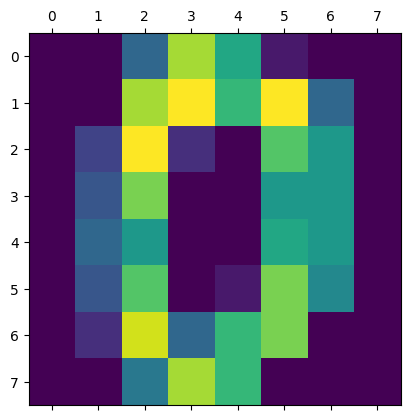

In [ ]:
plt.matshow(X[0].reshape((8,8)))

In [ ]:
y[0]
# This is telling the machine that this image means '0'

0

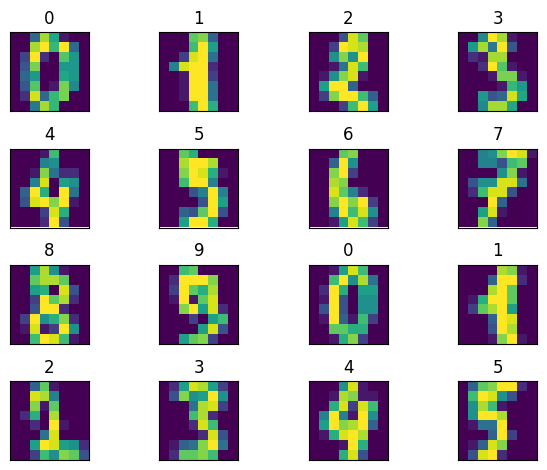

In [ ]:
fig, axes = plt.subplots(4,4)
# Two variables at the same time is using a python feature 'tuple unpacking'
# plt.subplots(4,4) will create a big figure and its subplots(4x4 grid in this case)
# fig: The entire figure or collection of subplots.
# axes: Individual subplots within the figure.
for x,yi, ax in  zip(X, y, axes.ravel()):
    # Notice that until now, X's elements are still in 1D format because we only reshaped the first element into 2D (8,8)
    # zip will combine things into tuples
    # x is an element of X, which is a 64-element 1D array
    # yi is an element of y, which will be an individual digit label in this case
    # ax is an element of axes.ravel()
    # ravel is a function to flatten multi-dimensional arrays
    # flatten: turn multi-dimensional arrays into 1D arrays

    ax.set_title(yi)
    # Setting the title of each subplot

    ax.imshow(x.reshape(8,8))
    # Displaying the image

    ax.set_xticks(())
    # Removing the x-axis ticks

    ax.set_yticks(())
    # Removing the y-axis ticks

plt.tight_layout()
# adjusts the padding between and around subplots to ensure they are displayed
# without overlapping %%

In [ ]:
axes.ravel().shape
# ravel will turn matrices into 1D array

(16,)

In [ ]:
axes.shape

(4, 4)

In [ ]:
X.shape

(1797, 64)

# Exercise II

Load the iris dataset from the ``sklearn.datasets`` module using the ``load_iris`` function.
The function returns a dictionary-like object that has the same attributes as ``digits``.

What is the number of classes, features and data points in this dataset?
Use a scatterplot to visualize the dataset.

You can look at ``DESCR`` attribute to learn more about the dataset.


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X,y = iris.data, iris.target

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
X.shape

(150, 4)

In [ ]:
import numpy as np
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

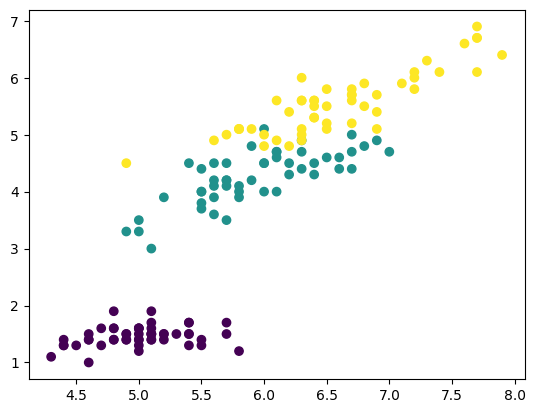

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,2], c=y)
# The first parameter provides the x-coordinates for the scatter plot
# The second parameter provides the y-coordinates for the scatter plot

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']